### Applied Machine Learning 
# Linear Regression Homework

<hr>

## Table of Contents
1. [Pearson Correlation Coefficient](#pearson)
2. [Ordinary Least Squares (OLS)](#ols)
3. [Simple Linear Regression Model using OLS (Student Effort)](#ex1)
4. [Simple Linear Regression Model using OLS (Kms vs Price)](#ex2)
6. [Gradient Descent](#gradient_descent)
5. [Ordinary Least Squares Equations](#ols_equations)

In [39]:
## importing libraries used in notebook 
import statsmodels.api as sm
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats.stats import pearsonr
from sklearn.metrics import r2_score
import math

%matplotlib inline

<a id="pearson"></a>
## Pearson Correlation Coefficient

<font size=5>$${r} = \frac{\sum_{}^{} ({x}-{\overline{x}})({y} - {\overline{y}})} {\sqrt{\sum({x}-{\overline{y}})^ 2} \sqrt{\sum({y}-{\overline{y}})^ 2 }} $$</font>

<br>
<font size=3>$${x} = Independent \ Variables $$
$$\overline{x} = \ Mean \ of \ Independent \ Variables $$
$${x} = Dependent \ Variables $$
$$\overline{y} = \ Mean \ of \ Dependent \ Variables $$
</font>

In [2]:
## function that calc mean 
def mean(array):
    return sum(array)/len(array)

## function that calc pearson correlation coefficient
## takes an array of tuples of size 2 (x,y)
## returns the r value 
def pearson_corr(array):
    ## unpacking  
    x = [num[0] for num in array]
    y = [num[1] for num in array]

    ## calc means 
    x_mean = mean(x)
    y_mean = mean(y)

    # calc r
    numerator = sum([(n[0] - x_mean) * (n[1] - y_mean) for n in array]) 
    denominator_x = (sum([(x - x_mean) ** 2 for x in x]) ** 0.5)
    denominator_y = (sum([(y - y_mean) ** 2 for y in y]) ** 0.5)
    return numerator / (denominator_x * denominator_y)

# dataset in the form of tuples (study hours, study-unit mark)
ds = [(84,70),(76,64),(90,83),(63,45), (55,40), (60,38), (34,20)]
r = pearson_corr(ds)
print("Pearson Correlation Coefficient (python):",r)

Pearson Correlation Coefficient (python): 0.9820405131850373


In [3]:
## pearsonr using scipy

x = [num[0] for num in ds]
y = [num[1] for num in ds]
r = pearsonr(x,y)[0]

print("Pearson Correlation Coefficient (scipy):",r)

Pearson Correlation Coefficient (scipy): 0.9820405131850373


In the dataset we used in the example we had the marks of a student and the hours spent studying.

<b>Which is the response variable and which is the explanatory variable ? </b> 

- Study Hours (explanatory variable) and it is plotted on the x-axis
- Study Unit Mark (response variable) and it is plotted on the y-axis


<a id="ols"></a>
## Ordinary Least Squares

<font size=5>$${m} = \dfrac{\sum\limits_{i=1}^{n} ({x_i - \overline{X}}) ({y_i} - \overline{Y})} {\sum\limits_{i=1}^{n} ({x_i - \overline{X}})^2} $$</font>
<br>

<font size=5>$${b} = \overline{Y} - {m}\overline{X}$$</font>
<br>

<font size=3>$${x} = Independent \ Variables $$
$$\overline{X} = \ Mean \ of \ Independent \ Variables $$
$${x} = Dependent \ Variables $$
$$\overline{Y} = \ Mean \ of \ Dependent \ Variables $$
</font>

<a id="ex1"></a>
## Simple Linear Regression Model using Ordinary Least Squares (Student Effort)

OLS (pure python) m: 1.1182648401826485 b: -22.376908023483367
OLS (pure python) m: 1.1182648401826485 b: -22.376908023483367
OLS (statsmodels) m: 1.1182648401826485 b: -22.37690802348338


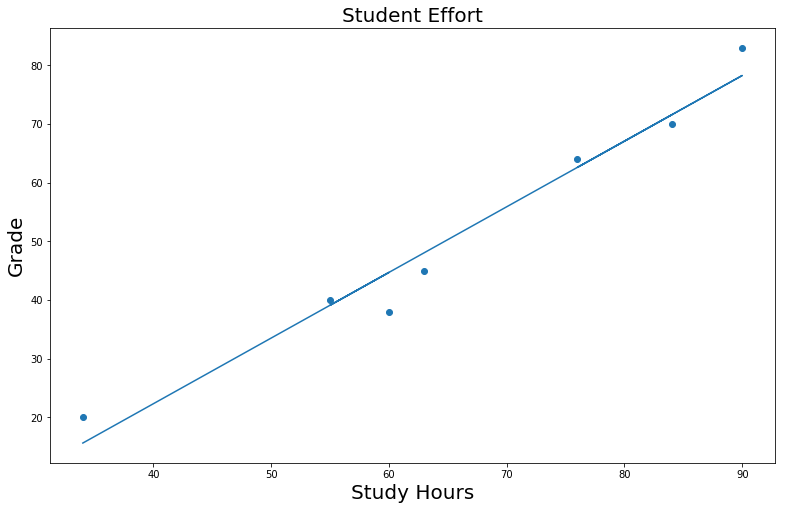

In [4]:
## building a simple linear regression model using OLS (studyhours/grades dataset)

## function that calc gradient and y-intercept using OLS 
## takes 2 arrays as arguments (must be of the same length)
## returns tuple (m,b)
def ols(x, y): ## OLS using just python
    
    ## calc means 
    x_m = mean(x)
    y_m = mean(y)
    
    ## make x and y arrays into a list of tuples
    xy = list(zip(x,y))
    
    ## calc m/gradient
    m_numerator = sum([(n[0] - x_m) * (n[1] - y_m) for n in xy])
    m_denominator = sum([(n[0]- x_m) ** 2 for n in xy])
    m = m_numerator / m_denominator
    
    ## calc b/y-intercept 
    b = y_m - m * x_m
    return (m,b) # returns tuple (gradient, y-intercept)


## function that calc gradient and y-intercept using OLS 
## takes 2 numpy arrays as arguments (must be of the same length)
## returns tuple (m,b)
def ols_numpy(x, y): ## OLS using numpy
    
    # calc means using numpy
    x_m = x.mean()
    y_m = y.mean()
    
    ## calc m/gradient
    m_numerator = np.sum((x - x_m) * (y - y_m)) ## using broadcasting 
    m_denominator = np.sum((x - x_m) ** 2)
    m = m_numerator / m_denominator
    
    ## calc b/y-intercept 
    b = y_m - m * x_m
    return(m,b) # returns tuple (gradient, y-intercept)

## calc m & y using OLS with pure python
olspy_params = ols(x, y)
print("OLS (pure python) m:",olspy_params[0],"b:",olspy_params[1])

## calc m & y using OLS with numpy 
x_np = np.array(x)
y_np = np.array(y)
olsnp_params = ols_numpy(x_np, y_np)
print("OLS (pure python) m:",olsnp_params[0],"b:",olsnp_params[1])

## calc m & y using OLS with statsmodels
X = sm.add_constant(x)
sm_model = sm.OLS(y, X).fit()
#print("\n" , sm_model.summary())
print("OLS (statsmodels) m:", sm_model.params[1],"b:",sm_model.params[0])

## plot simple linear regression model 
plt.figure(figsize=(13,8))
plt.scatter(x, y) # plot the scatter plot
plt.title("Student Effort", fontsize=20)
plt.xlabel("Study Hours", fontsize=20)
plt.ylabel("Grade", fontsize=20)
#model = x_np * olsnp_params[0] + olsnp_params[1] ## using numpy broadcasting
#plt.plot(x_np, model)
model = [num * olspy_params[0] + olspy_params[1] for num in x] ## using pure python
#print(model)
plt.plot(x, model) # plot the line
plt.show()

In [5]:
## using the model answer the following questions 
## - What mark will you get if you study for 80 hrs ?
## - How many hours of study do you need to get an A ?

## y = mx + b
q_1 = 80 * olspy_params[0] + olspy_params[1]
print("Q1: According to the model if you study for 80 hours you will score:", q_1)

## assuming you will need a grade of 90 to get an A 
## x = y - b / m !(m not equal to 0)!
q_2 = 90 - olspy_params[1] / olspy_params[0]
print("Q2: According to the model to get an A (90) you need to study for:", q_2 , "hours")

Q1: According to the model if you study for 80 hours you will score: 67.08427919112852
Q2: According to the model to get an A (90) you need to study for: 110.01038324680627 hours


<a id="ex2"></a>
## Simple Linear Regression Model using Ordinary Least Squares (kms vs price)

Pearson Correlation Coefficient (scipy): -0.5625445471263226
OLS (pure python) m: -0.04997200374057575 b: 12862.955271681236


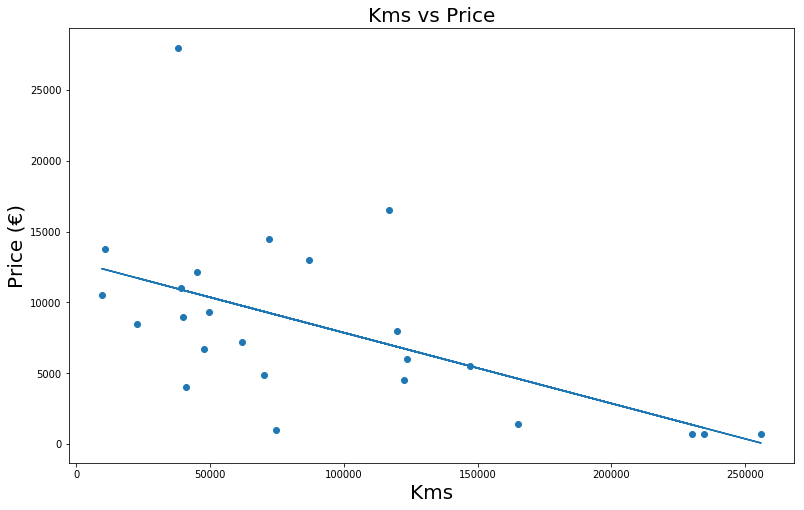

In [6]:
## building a simple linear regression model using OLS (car dataset - kms vs price)
car_ds = pd.read_csv("201819_car_insurance_data.csv")
x = [float(num[1].replace(",","")) for num in car_ds.values]
y = [float(num[2].replace(",","").replace("€", "")) for num in car_ds.values]

## calc pearson correlation coefficient
r = pearsonr(x,y)[0]
print("Pearson Correlation Coefficient (scipy):", r)

## calc m & y using OLS with pure python
olspy_params = ols(x, y)
print("OLS (pure python) m:",olspy_params[0],"b:",olspy_params[1])

## plot simple linear regression model 
plt.figure(figsize=(13,8))
plt.scatter(x, y) # plot the scatter plot
plt.title("Kms vs Price", fontsize=20)
plt.xlabel("Kms", fontsize=20)
plt.ylabel("Price (€)", fontsize=20)
model = [num * olspy_params[0] + olspy_params[1] for num in x] ## using pure python
plt.plot(x, model) # plot the line
plt.show()

<a id="gradient_descent"></a>
## Gradient Descent

Using Gradient Descent find a minimum for cost function:

<font size=4>$${J(x)} = 4{x}^4 - 3{x}^2 + 2{x} - 1 $$</font>

GD formula:

<font size=4>$${x} := {x} - \alpha \frac{d}{dx} {J(x)} $$</font>
<font size=4>$$ \frac{d}{dx} = 16{x}^3 - 6{x} + 2 $$</font>

Objective function:

<font size=5>$$ \substack{minimize \\ x } {J}(x)$$</font>

Alpha: 0.00025 
Maximum Iterations: 5000 
Change Threshold: 0.01 
Convergence Iteration: 63 
Initial x: 9.5


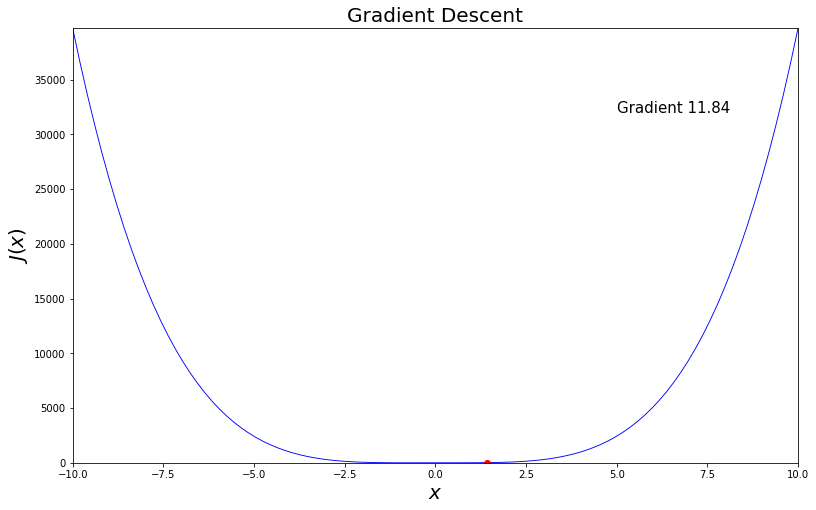

In [7]:
# gradient descent function
def gradient_descent(curr_x, alpha, max_epoch, threshold, cost, c_derivative):
    x_gd = []
    y_gd = []
    
    x_gd.append(curr_x)
    y_gd.append(cost(curr_x))
    
    curr_epoch = 0
    step_size = 1
    
    while step_size > threshold and curr_epoch < max_epoch:
        prev_x = curr_x
        curr_x = curr_x - alpha * c_derivative(prev_x)
        step_size = abs(curr_x - prev_x)
        curr_epoch = curr_epoch + 1 
        
        x_gd.append(curr_x)
        y_gd.append(cost(curr_x))
        
    return x_gd, y_gd, curr_epoch

# cost function (4x^4 - 3x^2 + 2x - 1)
cost = lambda x: ((4 * (x ** 4)) - (3 * (x ** 2)) + (2 * x) - 1) 

## hyperparameters
alpha = 0.00025 # learning rate
max_epoch = 5000 # maximum iterations
threshold = 0.01 # change threshold to stop iteration (converged)

# derivative of cost function 
c_derivative = lambda x: 16 * (x ** 3) - 6 * x + 2

x_min = -10
x_max = 10
x = np.linspace(x_min, x_max, 100) ## x values
y = cost(x)

## applying gradient descent
curr_x = 9.5
x_gd, y_gd, curr_epoch = gradient_descent(curr_x, alpha, max_epoch, threshold, cost, c_derivative)

def init():
    point.set_data([], [])
    return point, text

def animate(i):
    # animate points
    point.set_data(x_gd[i], y_gd[i])
    text.set_text("Gradient %.2f" % y_gd[i])
    return point, text

fig, ax = plt.subplots(figsize=(13,8))
ax.plot(x, y, lw = 0.9, color = 'b')
ax.set_xlim(x_min, x_max)
ax.set_ylim([min(y), max(y)])
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$J(x)$", fontsize=20)
ax.set_title("Gradient Descent", fontsize=20)

point, = ax.plot([], [], "ro")
text = ax.text(5,32000,"", fontsize = 15)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x_gd), interval=120,
                               repeat_delay=60, blit=True)

print("Alpha:", alpha , "\nMaximum Iterations:" , max_epoch, "\nChange Threshold:", threshold,
     "\nConvergence Iteration:", curr_epoch, "\nInitial x:" , curr_x)

#plt.show()
HTML(anim.to_jshtml())

## Evaluation of different models 

### ${R^2}$

Source:
https://onlinecourses.science.psu.edu/stat501/node/255/

In [97]:
# finds standard deviation
def standard_deviation(array):
    array_mean = mean(array)
    std = (sum([((num - array_mean) ** 2) for num in array]) / len(array)) ** 0.5
    return array_mean, std

# importing the new kms vs price dataset
car_ds = pd.read_csv("kms_price_dataset.csv")
x = [num[0] for num in car_ds.values]
y = [float(num[1].replace(",","").replace("€", "")) for num in car_ds.values]

# removing outliers
# using standard deviation
# eliminates any points which are more than or less than n times std from mean
std_threshold = 2
y_mean, y_std = standard_deviation(y)  
std_threshold_mean = y_std * std_threshold
y_no_outliers = []
x_no_outliers = []
y_outliers = []
x_outliers = []

for idx in enumerate(y):
    outlier = abs(y[idx[0]] - y_mean) > std_threshold_mean
    y_target = y_outliers if outlier else y_no_outliers
    x_target = x_outliers if outlier else x_no_outliers
    y_target.append(y[idx[0]])
    x_target.append(x[idx[0]])

std_outliers = len(y_outliers)
print("[Standard Deviation Method]\nSTD multiplier:", std_threshold , "\nOutliers removed: ", std_outliers)

[Standard Deviation Method]
STD multiplier: 2 
Outliers removed:  1


,Model,R^2
0,[Kms vs Price] Evaluation : Simple Linear Regression,0.470558
1,[Kms vs Price] Evaluation : Natural Log Transform [y-axis],0.570268
2,[Kms vs Price] Evaluation - STD Outliers 1 : Simple Linear Regression,0.436158
3,[Kms vs Price] Evaluation - STD Outliers 1 : Natural Log Transform [y-axis],0.478901


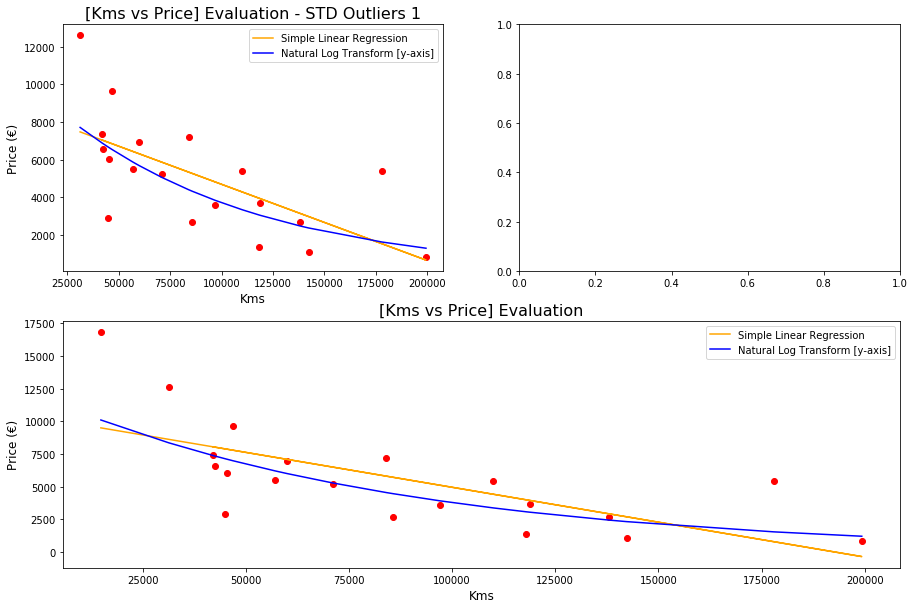

In [125]:
# calculates R^2
def rsquared(y, y_predicted):
    sse = sum([(y[i[0]] - y_predicted[i[0]]) ** 2 for i in enumerate(y)])
    y_mean = mean(y)
    ssto = sum([(num - y_mean) ** 2 for num in y])
    return 1 - (sse/ssto)

# sorts x and y keeping their positions 
def sorted_vectors(x, y):
    return zip(*sorted(zip(x, y)))

# model names & colors
slr_model_prop = ("Simple Linear Regression", "orange")
slrl_model_prop = ("Natural Log Transform [y-axis]", "blue")

#subplots for each evaluation
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(15,10))
ax1 = plt.subplot(gs[1, :]) 
ax2 = plt.subplot(gs[0, 0]) 
ax3 = plt.subplot(gs[0, 1]) 

# hold references to models 
# model_list: [evaluation_name,(x,y),[models],subplot] -> 0:Fulldataset, 1:STDNoOutliers
# models: []
model_list = [("[Kms vs Price] Evaluation", (x, y), [], ax1),
              ("[Kms vs Price] Evaluation - STD Outliers " + str(std_outliers), (x_no_outliers, y_no_outliers), [], ax2)]

# evaluating different models
# simple linear regression -full dataset
olspy_params = ols(x, y)
model = [num * olspy_params[0] + olspy_params[1] for num in x]
r_sqr = rsquared(y, model)
model_list[0][2].append((slr_model_prop, (x, model), r_sqr)) 

# simple linear regression transform (ln(y-axis)) -full dataset
y_log = [math.log(num) for num in y]
olspy_params = ols(x, y_log)
model = [math.e ** (num * olspy_params[0] + olspy_params[1]) for num in x] 
r_sqr = rsquared(y, model)
s_x, s_y = sorted_vectors(x, model)
model_list[0][2].append((slrl_model_prop, (s_x, s_y), r_sqr)) 

# simple linear regression -removed outliers STD method 
olspy_params = ols(x_no_outliers, y_no_outliers)
model = [num * olspy_params[0] + olspy_params[1] for num in x_no_outliers]
r_sqr = rsquared(y_no_outliers, model)
model_list[1][2].append((slr_model_prop, (x_no_outliers, model), r_sqr)) 

# simple linear regression transform (ln(y-axis)) -removed outliers STD method
y_log = [math.log(num) for num in y_no_outliers]
olspy_params = ols(x_no_outliers, y_log)
model = [math.e ** (num * olspy_params[0] + olspy_params[1]) for num in x_no_outliers] 
r_sqr = rsquared(y_no_outliers, model)
s_x, s_y = sorted_vectors(x_no_outliers, model)
model_list[1][2].append((slrl_model_prop, (s_x, s_y), r_sqr)) 

# plot models  
for e in model_list: # loop different evaluations
    target_ax = e[3]
    target_ax.set_title(e[0], fontsize = 16)
    target_ax.set_xlabel("Kms", fontsize = 12)
    target_ax.set_ylabel("Price (€)", fontsize = 12)
    target_ax.scatter(e[1][0], e[1][1], color = "r")
    for m in e[2]: # loop different models
        target_ax.plot(m[1][0], m[1][1], label = m[0][0], color = m[0][1])
    target_ax.legend(loc="upper right")
    
# convert model_list to dataframe to show result  
model_df = pd.DataFrame([(str(e[0] + " : " + m[0][0]), m[2])
                         for e in model_list for m in e[2]], columns = ['Model', 'R^2'])
pd.set_option('colwidth', 100)
display(model_df.head())

<a id="ols_equations"></a>
## Equations in Ordinary Least Squares (OLS)

A straight line is represented as follows:

<font size=4>$${y} = {mx} + {b}$$</font>

<font size=2>$${m} = slope/gradient$$
$${b} = y \ intercept$$</font>


In order to find a line of best fit we need to find the line with the least error (${E}$) from all the other possible lines. In OLS to calculate the global error (for all points) we use the following: 

<font size=4>$${E} = \sum_{i=1}^{n} (\hat{y} - {y}) ^ 2 $$</font>

<font size=2>$${y} = point $$
$${\hat{y}} = estimated \ point$$</font>

<font size=4>$$= \sum_{i=1}^{n} (\hat{y} - {y}) ^ 2 $$</font>
<font size=4>$$= \sum_{i=1}^{n} ({mx} + {b} - {y}) \ ({mx} + {b} - {y}) $$</font>
<font size=4>$$= \sum_{i=1}^{n} ({m}^2 {x}^2 + {bmx} - {ymx} + {bmx} + {b^2} - {by} - {ymx} -{by} + {y^2}) $$</font>
<font size=4>$$= \sum_{i=1}^{n} ({m^2} {x^2} + {2bmx} - {2ymx} + {b^2} - {2yb} + {y^2}) $$</font>
<font size=4>$$= {m^2} \sum{x^2} + {2bm}\sum{x} - {2m} \sum{xy} + {nb^2} - {2b} \sum{y} + \sum{y^2} $$</font>

<br>
<br>
Now we need to find where the derivative is 0. Do to so we use partial differentiation (${m}$ & ${b}$)

<font size=4>$$E = {m^2} \sum{x^2} + {2bm}\sum{x} - {2m} \sum{xy} + {nb^2} - {2b} \sum{y} + \sum{y^2} $$</font>
<br>
<br>
<font size=4>$$\frac{\partial E}{\partial m} = {2m}\sum{x^2} + {2b}\sum{x} - 2 \sum{xy} = 0 $$</font>

<font size=4>$$ =\frac{{2m}\sum{x^2} + {2b}\sum{x} - 2 \sum{xy}}{2} = 0 $$</font>

<font size=4>$$ ={m}\sum{x^2} + {b}\sum{x} - \sum{xy} = 0 $$</font>
<br>
<br>
<font size=4>$$\frac{\partial E}{\partial b} = {2m}\sum{x} + {2nb}- 2 \sum{y} = 0 $$</font>

<font size=4>$$= \frac{{2m}\sum{x} + {2nb}- 2 \sum{y}}{2} = 0 $$</font>

<font size=4>$$= {m}\sum{x} + {nb}- \sum{y} = 0 $$</font>

Making ${b}$ & ${m}$ subject of the formulas:

<font size=4>$${m}\sum{x^2} + {b}\sum{x} - \sum{xy} = 0 $$</font>

<font size=4>$${m} = \frac{\sum{xy} - {b}\sum{x}}{\sum{x^2}}  $$</font>
<br>
<br>
<font size=4>$$ {m}\sum{x} + {nb}- \sum{y} = 0 $$</font>

<font size=4>$${b}= \frac{\sum{y} - {m} \sum{x}}{n} $$</font>

Replacing ${b}$ in the formula for ${m}$:

<font size=4>$${m} = \frac{\sum{xy} - (\frac{\sum{y} - {m} \sum{x}}{n}) \sum{x}}{\sum{x^2}}  $$</font>

Making ${m}$ subject of the formula:

<font size=4>$${m} = \frac{\frac{{n}\sum{xy}-\sum{x} \ (\sum{y}-{m}\sum{x})}{n}}{\sum{x^2}} $$</font>

<font size=4>$${m} = \frac{{n}\sum{xy} - \sum{x}\sum{y} + m (\sum{x}) ^ 2}{{n}} \cdot \frac{1}{\sum{x^2}}$$</font>

<font size=4>$${m} = \frac{{n}\sum{xy} - \sum{x}\sum{y} + m (\sum{x}) ^ 2}{{n\sum{x^2}}} $$</font>

<font size=4>$${m} - \frac{{m}(\sum{x})^2}{{n}\sum{x^2}} = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}} $$</font>

<font size=4>$${m} \ (1 - \frac{(\sum{x})^2}{{n}\sum{x^2}}) = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}} $$</font>

<font size=4>$${m} \ ( \frac{{n}\sum{x^2} -(\sum{x})^2}{{n}\sum{x^2}}) = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}} $$</font>

<font size=4>$${m} = \frac{\frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}}}{\frac{{n}\sum{x^2} -(\sum{x})^2}{{n}\sum{x^2}}} $$</font>

<font size=4>$${m} = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n\sum{x^2}}} \cdot \frac{{n}\sum{x^2}}{{n}\sum{x^2} -(\sum{x})^2}$$</font>


<font size=4>$${m} = \frac{{n}\sum{xy} - \sum{x}\sum{y}}{{n}\sum{x^2} -(\sum{x})^2}$$</font>

<br>
<br>
Replacing ${m}$ in the formula for ${b}$:

<font size=4>$${b}= \frac{\sum{y} - (\frac{\sum{xy} - {b}\sum{x}}{\sum{x^2}}) \sum{x}}{n} $$</font>

Making ${b}$ subject of the formula:

<font size=4>$${b}= \frac{\frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}+{b}(\sum{x})^2}{\sum{x^2}}}{n} $$</font>

<font size=4>$${b}= \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}+{b}(\sum{x})^2}{\sum{x^2}} \cdot \frac{1}{n} $$</font>

<font size=4>$${b}= \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}+{b}(\sum{x})^2}{{n}\sum{x^2}} $$</font>

<font size=4>$${b} - \frac{{b}(\sum{x})^2}{{n}\sum{x^2}} = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}} $$</font>

<font size=4>$${b} \ (1 - \frac{(\sum{x})^2}{{n}\sum{x^2}}) = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}} $$</font>

<font size=4>$${b} \ (\frac{{n}\sum{x^2} - (\sum{x})^2}{{n}\sum{x^2}}) = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}} $$</font>

<font size=4>$${b} = \frac{\frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}}}{\frac{{n}\sum{x^2} - (\sum{x})^2}{{n}\sum{x^2}}} $$</font>

<font size=4>$${b} = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}}{{n}\sum{x^2}} \cdot \frac{{n}\sum{x^2}}{ {n}\sum{x^2} - (\sum{x})^2} $$</font>

<font size=4>$${b} = \frac{\sum{x^2}\sum{y} - \sum{x}\sum{xy}} {{n}\sum{x^2} - (\sum{x})^2} $$</font>